In [485]:
import pandas as pd
from prophet import Prophet
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.serialize import model_to_json, model_from_json
import json
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [138]:
db_engine = create_engine('{key}')

In [252]:
data = pd.read_sql('''select "date" as ds, sum("{metric") as y
from "{db}"
where "category"='{cat}' and
"date" between '2019-01-01' and '2021-12-31' and
"country"='{country}'
group by "date"
order by "date" desc;''', db_engine)

In [357]:
holidays = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.to_datetime(['2019-11-29', '2020-11-27', '2021-11-25']),
  'lower_window': 0,
  'upper_window': 3})

In [488]:
m = Prophet(holidays=holidays)

In [ ]:
m.fit(data)

In [490]:
future = m.make_future_dataframe(periods=365, freq='D')

In [492]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

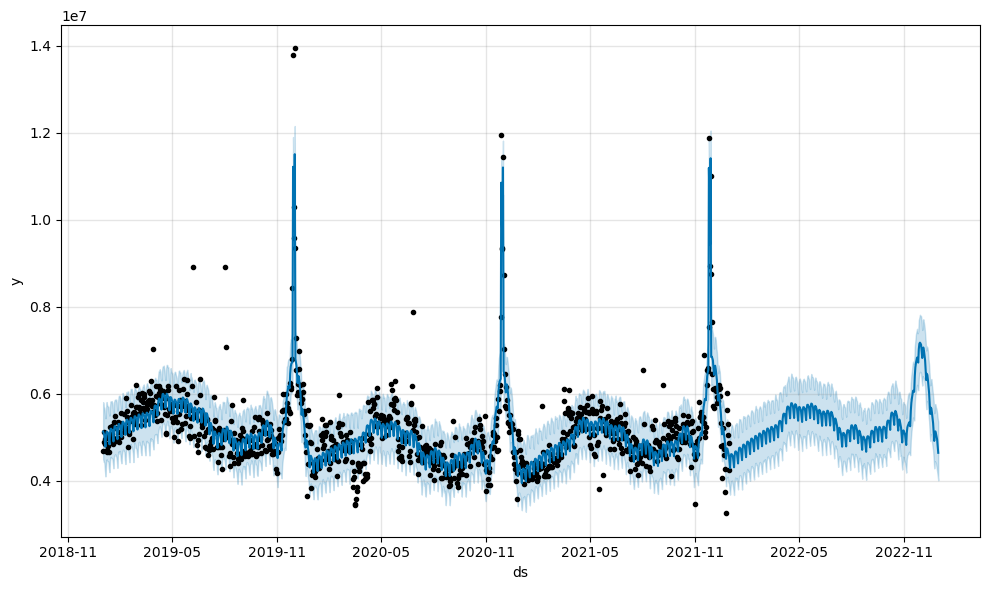

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
df_cv_1y = cross_validation(m, initial='730 days', period='7 days', horizon = '365 days')

<AxesSubplot:xlabel='ds'>

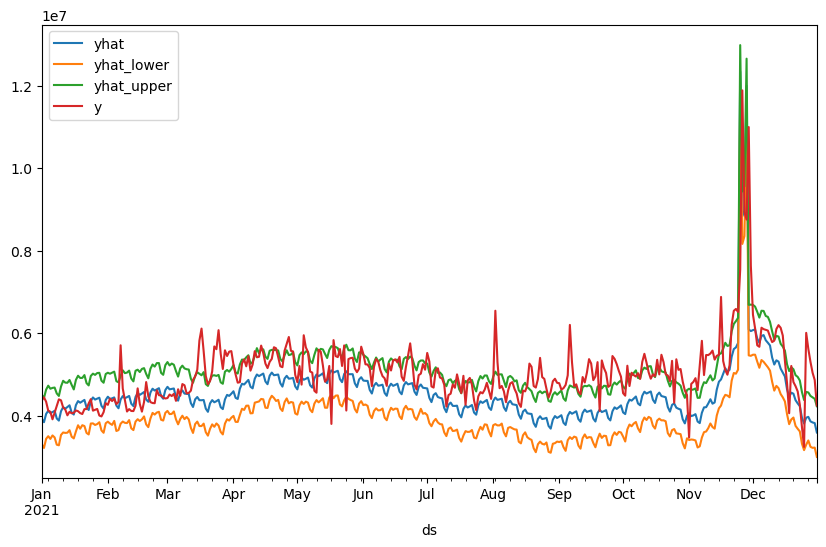

In [ ]:
df_cv_1y.plot(x='ds', y=['yhat', 'yhat_lower', 'yhat_upper', 'y'])

In [ ]:
df_cv_1q = cross_validation(m, initial='1006 days', period='1 days', horizon = '89 days')

<AxesSubplot:xlabel='ds'>

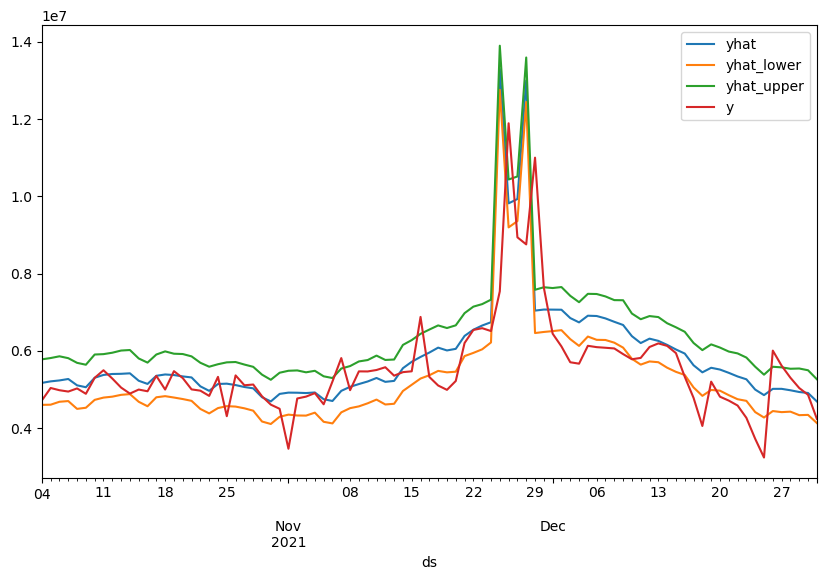

In [ ]:
df_cv_1q.plot(x='ds', y=['yhat', 'yhat_lower', 'yhat_upper', 'y'])